In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

n_points = 50
std = 0.02  # Balanced variance

# Define closer but not overlapping means
class_means = {
    "ja":   [0.49, 0.50],
    "nein": [0.53, 0.45],
}

data = {"x": [], "y": [], "Klasse": []}

# Generate points for ja and nein
all_xs, all_ys = [], []

for klasse, (mean_x, mean_y) in class_means.items():
    xs = np.random.normal(loc=mean_x, scale=std, size=n_points)
    ys = np.random.normal(loc=mean_y, scale=std, size=n_points)
    
    all_xs.extend(xs)
    all_ys.extend(ys)
    
    data["x"].extend(xs)
    data["y"].extend(ys)
    data["Klasse"].extend([klasse] * n_points)

# Compute center for 'x'
x_mean = np.mean(all_xs)
y_mean = np.mean(all_ys)

# Add 'x' as single point
data["x"].append(x_mean)
data["y"].append(y_mean)
data["Klasse"].append("x")

# Generate 'shot' around 'x'
shot_xs = np.random.normal(loc=x_mean, scale=std, size=n_points//3)
shot_ys = np.random.normal(loc=y_mean, scale=std, size=n_points)

data["x"].extend(shot_xs)
data["y"].extend(shot_ys)
data["Klasse"].extend(["shot"] * n_points)

# Create DataFrame
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 6))
for klasse in df["Klasse"].unique():
    subset = df[df["Klasse"] == klasse]
    plt.scatter(subset["x"], subset["y"], label=klasse, s=80, edgecolor='k')

plt.title("Moderately Overlapping Clusters with 'shot' Points Around 'x'")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(title="Klasse")
plt.grid(True)
plt.tight_layout()
plt.show()


TypeError: unsupported operand type(s) for //: 'list' and 'int'

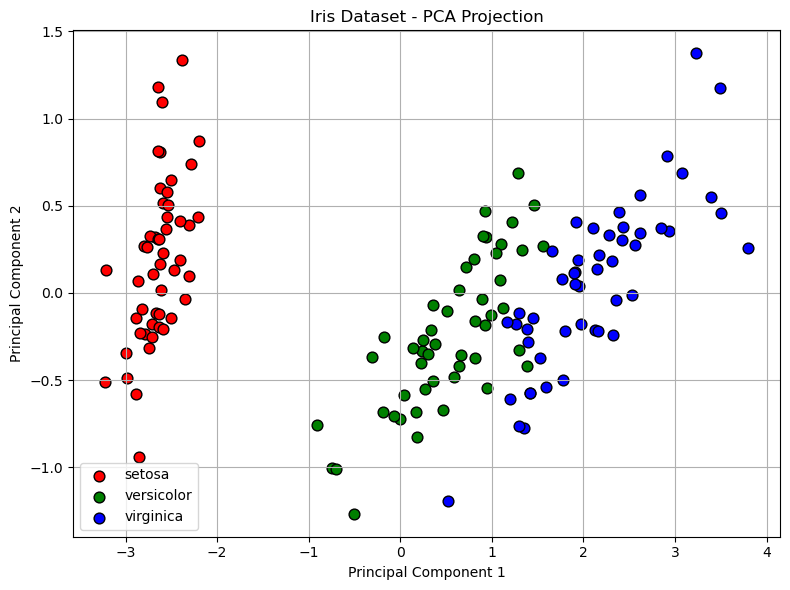

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data         # Features: 4D
y = iris.target       # Classes: 0, 1, 2
target_names = iris.target_names

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, color, label in zip(range(3), colors, target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, label=label, edgecolor='k', s=60)

plt.title("Iris Dataset - PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
